# Ex02 - Histograma e Transformações de intensidade

Esta atividade tem 2 objetivos principais: 
    - entender o conceito de histograma e estatísticas da imagem
    - explorar várias formas de transformação de intensidade dos pixels. 

## Parte 1 - Histograma

Leia o notebook [Histograma de imagens](05_Histograma_da_imagem.ipynb) para entender o conceito de histograma e o uso da função *np.histogram*. Veja também como é plotado o histograma usando gráfico de barras.

### Exercício 1.1

Vamos tentar calcular o histograma de uma imagem colorida. Use a imagem *versicolor.jpg* a seguir e plote o histograma de cada uma das bandas usando um gráfico de barras.

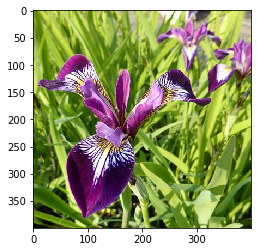

In [79]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

img = mpimg.imread('../figures/versicolor.jpg')
plt.imshow(img)


## Preprocessing and Investigation

    Before we are able to analyse the input image, somethings must be analysed and setup. First, we separate the image into 3. One image for each layer: red, green, blue. We plot the images in grayscale so that we can check that the separation was correctly done and makes sense.

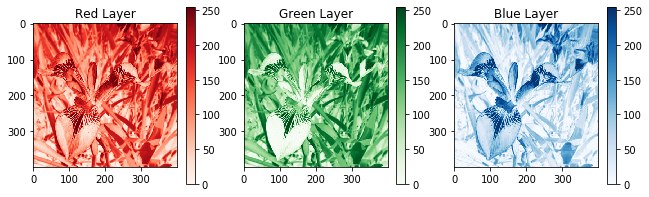

In [80]:
#save image shape in colorImg_shape variable
colorImg_shape = img.shape

rImg = img[:,:,0]  #
gImg = img[:,:,1]  # ### save each layer of the image into the corresponding array
bImg = img[:,:,2]  #

#create sublpot for visualizing layers side-by-side
fig, axs = plt.subplots(1,3, figsize=(12, 6)) 
plt.tight_layout() 


#fill subplot
plt.subplot(241)
plt.title('Red Layer')
plt.imshow(rImg, cmap='Reds')
plt.colorbar()

plt.subplot(242)
plt.title('Green Layer')
plt.imshow(gImg, cmap='Greens') 
plt.colorbar()

plt.subplot(243)
plt.title('Blue Layer')
plt.imshow(bImg, cmap='Blues') 
plt.colorbar()

    Next step is writing a function for plotting the histograms that we know we will need. This makes sense because we want to plot 3 histograms (one for each layer) and we don't want to repeat large pieces of code, in the interest of keeping our code clean. 
    In the "generateHistogram" function our inputs are: nbins (the number of intervals for the bar-graph, consequently, the number of bars we will have), the image array for the layer we want, and the layer which is to be plotted, in string format. Then, we execute numpy's histogram function. The problem with this is that, if plotted, we will have a continuous graph. This naturally doesn't makes sense as we have a value for each bin. Which means the best way of displaying the information obtained is in a bar-graph. 
    The np.historgram function returns the number of pixels with values in each interval. The size and edges of each interval are direct consequences of number of bins we use.
    Finaly, on the X-axis, we want to plot the the values on the center of each interval (*bin center*) and not on the edges of them (*bin edges*), so we calculate the a bin_center value for each bin.

In [81]:
# Histogram Generation Function
def generateHistogram(nbins, image, layer):
    
    count, bin_edges = np.histogram(image, nbins,(0,255)) #create histogram, 0-255 is due to the color-scale 
    w=255./nbins #width of each bin
    bin_centers = bin_edges[1:]-(w/2) #calculate bin centers
    
    plt.bar(bin_centers, count, width=w, color=layer) #plot bar-graph around bin centers
    plt.title('Bar-Graph Histogram: '+layer+' layer')
    return count, bin_edges # important to return these values so that they can be later accessible if needed

(array([ 350,  795, 1312, 1567, 2093, 3591, 3956, 4214, 4850, 4263, 5312,
        4951, 5181, 6319, 5925, 6090, 6631, 5206, 5510, 4417, 4224, 4688,
        3859, 3981, 5025, 4725, 5106, 4268, 4590, 5666, 5006, 5227, 5658,
        3657, 2961, 1747, 1234, 1362, 1218, 3265], dtype=int64),
 array([  0.   ,   6.375,  12.75 ,  19.125,  25.5  ,  31.875,  38.25 ,
         44.625,  51.   ,  57.375,  63.75 ,  70.125,  76.5  ,  82.875,
         89.25 ,  95.625, 102.   , 108.375, 114.75 , 121.125, 127.5  ,
        133.875, 140.25 , 146.625, 153.   , 159.375, 165.75 , 172.125,
        178.5  , 184.875, 191.25 , 197.625, 204.   , 210.375, 216.75 ,
        223.125, 229.5  , 235.875, 242.25 , 248.625, 255.   ]))

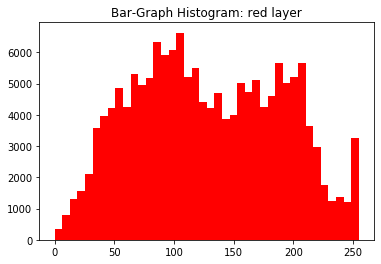

In [82]:
redCount, red_bin_edges = generateHistogram(40, rImg, 'red')
redCount, red_bin_edges

(array([6197, 2673, 2819, 2124, 1720, 1856, 1681, 1901, 2521, 2310, 2838,
        2795, 3390, 4114, 3678, 3901, 5152, 4749, 5885, 5890, 6522, 6880,
        5508, 4922, 5428, 4265, 4860, 4209, 4338, 5331, 4522, 4533, 5088,
        4632, 5777, 4417, 3587, 3139, 1634, 2214], dtype=int64),
 array([  0.   ,   6.375,  12.75 ,  19.125,  25.5  ,  31.875,  38.25 ,
         44.625,  51.   ,  57.375,  63.75 ,  70.125,  76.5  ,  82.875,
         89.25 ,  95.625, 102.   , 108.375, 114.75 , 121.125, 127.5  ,
        133.875, 140.25 , 146.625, 153.   , 159.375, 165.75 , 172.125,
        178.5  , 184.875, 191.25 , 197.625, 204.   , 210.375, 216.75 ,
        223.125, 229.5  , 235.875, 242.25 , 248.625, 255.   ]))

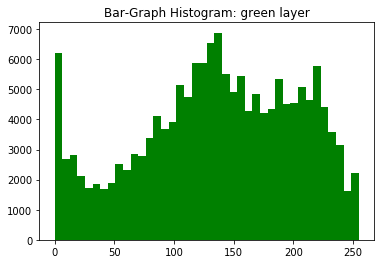

In [83]:
greenCount, green_bin_edges = generateHistogram(40, gImg, 'green')
greenCount, green_bin_edges

(array([18609,  8202,  8331,  6519,  6182,  6979,  5932,  6362,  7139,
         5818,  6613,  5397,  5289,  6323,  5635,  5258,  5544,  4084,
         3961,  2780,  2468,  2597,  2010,  1880,  2174,  1751,  1856,
         1322,  1111,  1232,   961,   889,  1031,   756,   804,   757,
          701,   971,  1000,  2772], dtype=int64),
 array([  0.   ,   6.375,  12.75 ,  19.125,  25.5  ,  31.875,  38.25 ,
         44.625,  51.   ,  57.375,  63.75 ,  70.125,  76.5  ,  82.875,
         89.25 ,  95.625, 102.   , 108.375, 114.75 , 121.125, 127.5  ,
        133.875, 140.25 , 146.625, 153.   , 159.375, 165.75 , 172.125,
        178.5  , 184.875, 191.25 , 197.625, 204.   , 210.375, 216.75 ,
        223.125, 229.5  , 235.875, 242.25 , 248.625, 255.   ]))

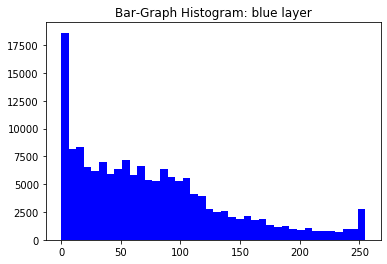

In [84]:
blueCount, blue_bin_edges = generateHistogram(40, bImg, 'blue')
blueCount, blue_bin_edges 

### Exercício 1.2

Usando a mesma imagem colorida do item anterior, converta a imagem para níveis de cinza, usando um dos métodos abaixo:
   - convert(L) do PIL;
   - médias das bandas R, G, B;
   - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
Em seguida, calcule o histograma da imagem convertida para níveis de cinza. Compare com os histogramas coloridos e comente.   

       Here we shall try to obtain the image of the flower in grayscale. The main methods can be found on the following web page:  https://thoughtbot.com/blog/closer-look-color-lightness
    
    Our first method uses the "convert" method from the Image class of the PIL library:

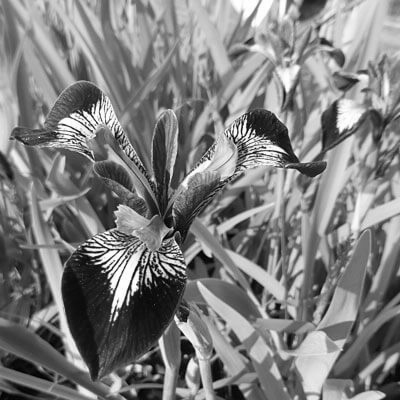

In [85]:
#load image into as an instance of "Image" 
Flower = Image.open('../figures/versicolor.jpg') 
#execute "convert" method ("L" input activates dithering as to not loose information through the palette)
PIL_Flower = Flower.convert("L") 
#view result as output
PIL_Flower 

        Next, we shall try to convert the image to grayscale by calculating the mean value of each pixel: (red+green+blue)/3. This method is also known as the Intensity method via arithmetic mean (there is also the same method via geometric mean). Naturally, we do not expect a good result.

(-0.5, 399.5, 399.5, -0.5)

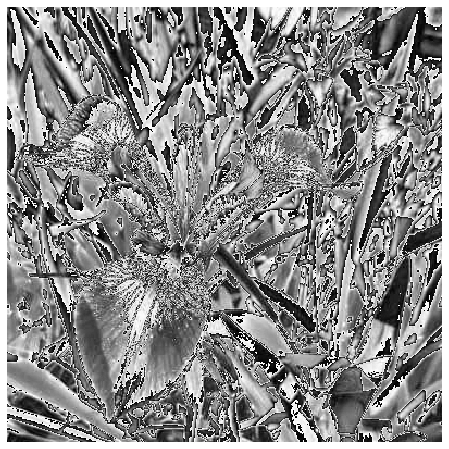

In [86]:
rgbMeanFlower = rImg + gImg + bImg #creates one array with element by element
rgbMeanFlower = np.true_divide(rgbMeanFlower,3) #divides all elements in the new array by 3 (mean)
plt.figure(figsize=(8,8)) # to show larger image
plt.imshow(rgbMeanFlower, cmap='gray') #show image in gray color map
plt.axis('off') #turn off axi


    Finaly, lets apply the most used method for RGB to Grayscale conversion: the luminosity method. In this case, instead of a mean (as done above), we execute a weighted average:
    
                          ColoredPixel = 0.2126*RedPixel + 0.7152*GreenPixel + 0.0722*BluePixel

(-0.5, 399.5, 399.5, -0.5)

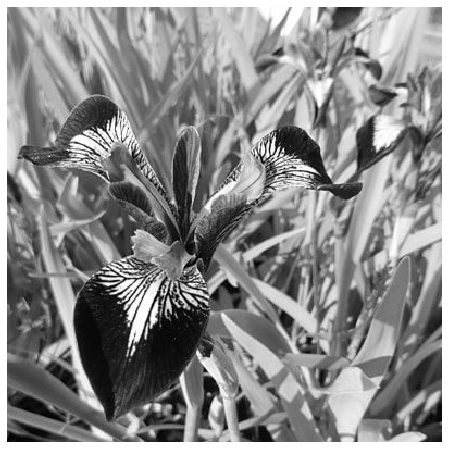

In [87]:
rgbLuminosityFlower = 0.2126*rImg + 0.7152*gImg + 0.0722*bImg #create grayscale image according to the Luminosity Method
plt.figure(figsize=(8,8)) #show image larger
plt.imshow(rgbLuminosityFlower, cmap='gray') #show image in gray color map
plt.axis('off') #turn off axi

    Now let's calculate the histogram of "rgbLuminosityFlower" and compare it with the histograms of each color band.

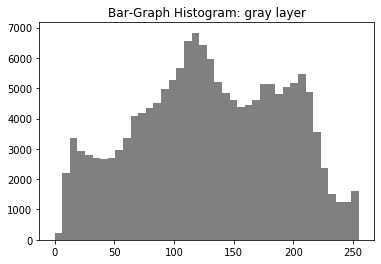

In [88]:
flowerCount, flower_bin_edges = generateHistogram(40,rgbLuminosityFlower,'gray')

    Let's plot all 4 histograms side-by-side in a subplot to facilitate analysis.

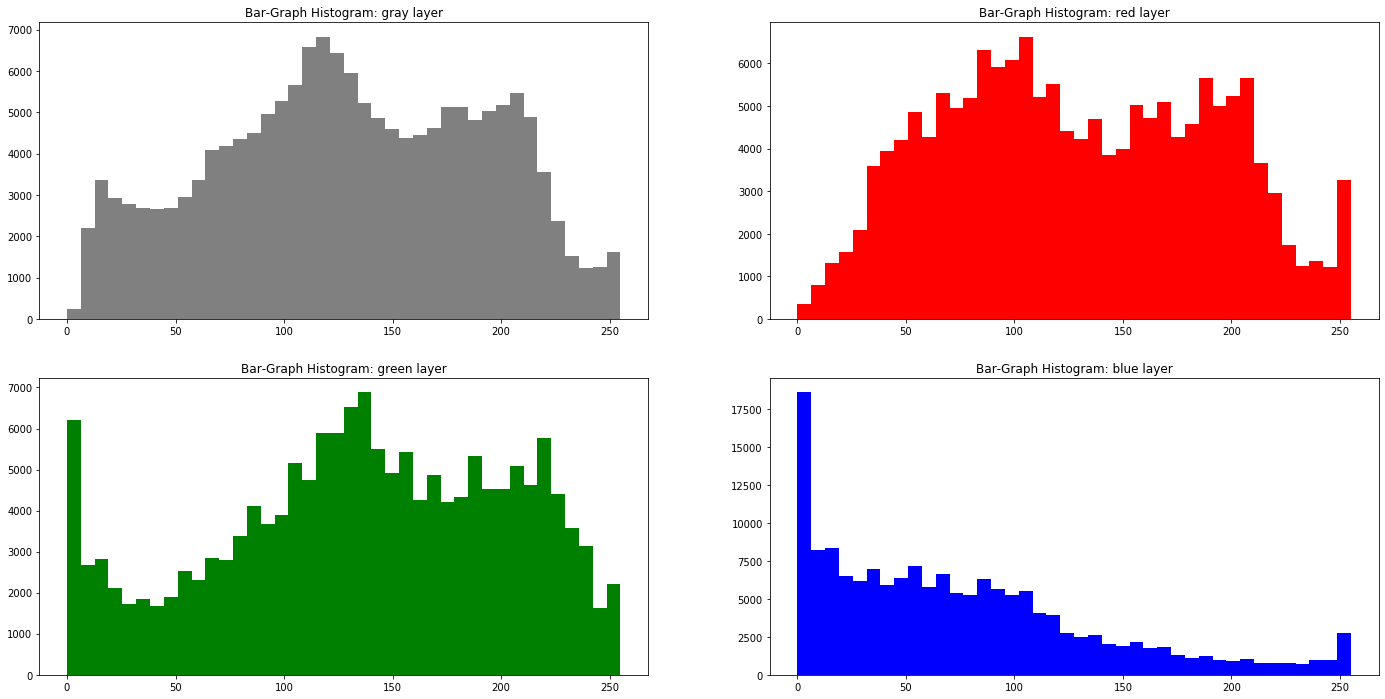

In [89]:
fig, axs = plt.subplots(2,2, figsize=(24, 12)) 

plt.subplot(221)
flowerCount, flower_bin_edges = generateHistogram(40,rgbLuminosityFlower,'gray')

plt.subplot(222)
redCount, red_bin_edges = generateHistogram(40, rImg, 'red')

plt.subplot(223)
greenCount, green_bin_edges = generateHistogram(40, gImg, 'green')

plt.subplot(224)
blueCount, blue_bin_edges = generateHistogram(40, bImg, 'blue')


    As we can see, each histogram differs from the others:
        The grayscale, red band, and green band histograms have a pretty distributed concentration of pixels throughout the 256 scalealso. What distinguishes them is mainly that the green has very high concentration of pixels close to value 0, while the gray and red do not. Apart from that, they are obviously different, but have more or less a similar figure. Especially when we consider the blue band histogram, which is very different from the others: the concentration basically starts high with the first bin (close to 0) and gradually gets smaller in the direction of the "high pixel" bins (in direction of 256).

## Parte 2 - Transformação de Intensidade

É a categoria de funções que apenas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Para entender como isso é implementado na prática, estudem atentamente o tutorial sobre Transformada de intensidade ([tutorial](../master/tutorial_ti_2.ipynb)).


### Exercício 2.1
Veja a imagem abaixo. Escolha um valor de limiar (threshold) para separar as bolachas do fundo da imagem. Dica: Visualize o histograma da imagem para escolher o valor. Crie primeiro uma função de transformação T e depois aplique esta transformação para obter o objeto de interesse (cookies) pintados de branco e o fundo em preto.

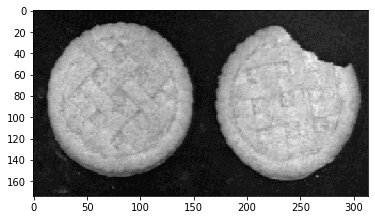

In [90]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../figures/cookies.pgm')  
plt.imshow(f,cmap='gray')


    First we need to analyse the information contained within the image. The best way to do that is with the bar-graph histogram. To do so we re-use the "generateHistogram" function written for the first part of this exercise.

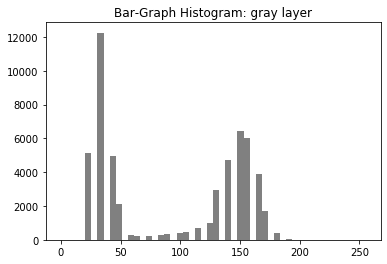

In [91]:
fcount, f_bin_edges = generateHistogram(50, f, 'gray')
#fcount
#f_bin_edges


    As we can see, there is a clear difference between the range of pixels which represent the cookies and the range of pixels that represent the backround. As a threshold, any value between 60 and 100 should do fine. But the best threshold is where, between 60 and 100, we find the "local minimum". That being said, we will use 70 as our threshold.

In [92]:
import sys,os
ea979path = os.path.abspath('../../')
if ea979path not in sys.path:
    sys.path.append(ea979path)
import ea979.src as ia


identity_transf = np.arange(256).astype('uint8') #identity function
threshold_transf = ia.normalize(identity_transf > 70) #threshold function


    Having defined our threshold transformation, we now must apply the transformation to our image:

""
original image
""
threshold_trans[f]

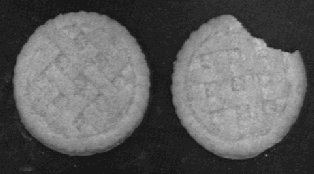
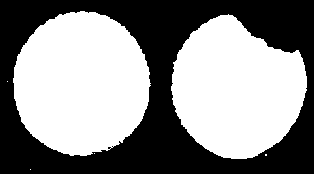

In [93]:
f1 = threshold_transf[f]
nb = ia.nbshow(2)

# Show oringal image next to the transformed image
nb.nbshow(f, 'original image')
nb.nbshow(f1,'threshold_trans[f]')
nb.nbshow()

### Exercício 2.2
Você é capaz de usar o que apresndeu em transformações radiométricas e transformar a imagem para identificar o número da placa do carro apresentado na imagem abaixo? Explique seu raciocínio para chegar na solução.

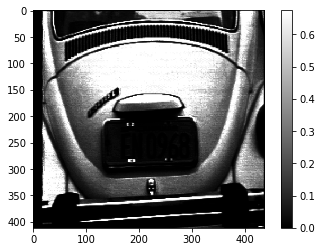

In [94]:
fusca = mpimg.imread('../figures/fusca.png')  
plt.imshow(fusca,cmap='gray')
plt.colorbar() #insert color bar


        By looking at the colorbar above, we realize that the pixel values, instead of dtype=uint8 from 0 to 255, are dtype = float32 from 0 to around 0.7. Let's check this is correct:

In [95]:
fusca #check information in array


array([[0.        , 0.        , 0.        , ..., 0.16862746, 0.01176471,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1882353 , 0.01568628,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22745098, 0.01568628,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.17254902, 0.01176471,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04705882, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00784314, 0.        ,
        0.        ]], dtype=float32)

    Here we must remember that when we want to apply T to f (T[f]), since the values of f are indexes for T, they can't be of dtype = float. This means that we must preprocess the image for it to be ready to be transformed.

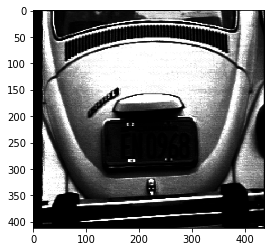

In [96]:
intfusca = np.round(fusca * 255.0) #change from 0-1 scale to 0-255 scale (still dtype = float32)
intfusca = intfusca.astype(int) #change array type from from float to int
plt.imshow(intfusca,cmap='gray') #show image

    Now that we have prepared the image for the transformation process, we can proceed. The information which we need to be accessible is the license plate number from the image. As we can see, the number can't be read in the original image because the color of the numbers is to close to the color of the plate. If we run a logarithmic transformation on the image, we can "focus" on the darker shades of gray in the sense that a larger part of the color scale will be dedicated to the darker parts of the image. With that, we should be able to read the number on the license plate.

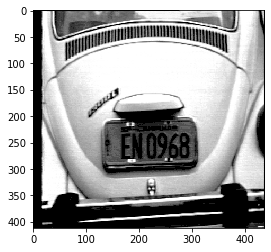

In [97]:
log_transf = ia.normalize(np.log(identity_transf+1.)) #define the logarithmic transfomation - intensifies dark colors
final = log_transf[intfusca] #apply the transformation
plt.imshow(final,cmap='gray')

    As we can see, the license plate number is EN 0968